In [1]:
import pandas as pd

In [2]:
v4 = pd.read_csv("Vital_signs_4.csv")

In [3]:
v4.describe()

,subject_id,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
count,3471.000000,3454.000000,3470.000000,3468.000000,3431.000000,3360.000000,3360.000000
mean,14342.510228,18401.690793,88.668876,19.331892,97.753955,122.372321,59.619643
std,8427.369037,11442.089960,21.211182,6.757939,4.906014,33.851757,17.717608
min,3.000000,4.000000,29.000000,0.000000,0.000000,0.000000,0.000000
25%,7149.500000,8957.250000,74.000000,15.000000,97.000000,104.000000,50.000000
50%,14315.000000,17961.500000,87.000000,18.000000,98.000000,122.000000,59.000000
75%,21370.500000,26736.250000,102.000000,23.000000,99.099998,142.000000,70.000000
max,32763.000000,47473.000000,217.000000,98.000000,107.599998,237.000000,197.000000


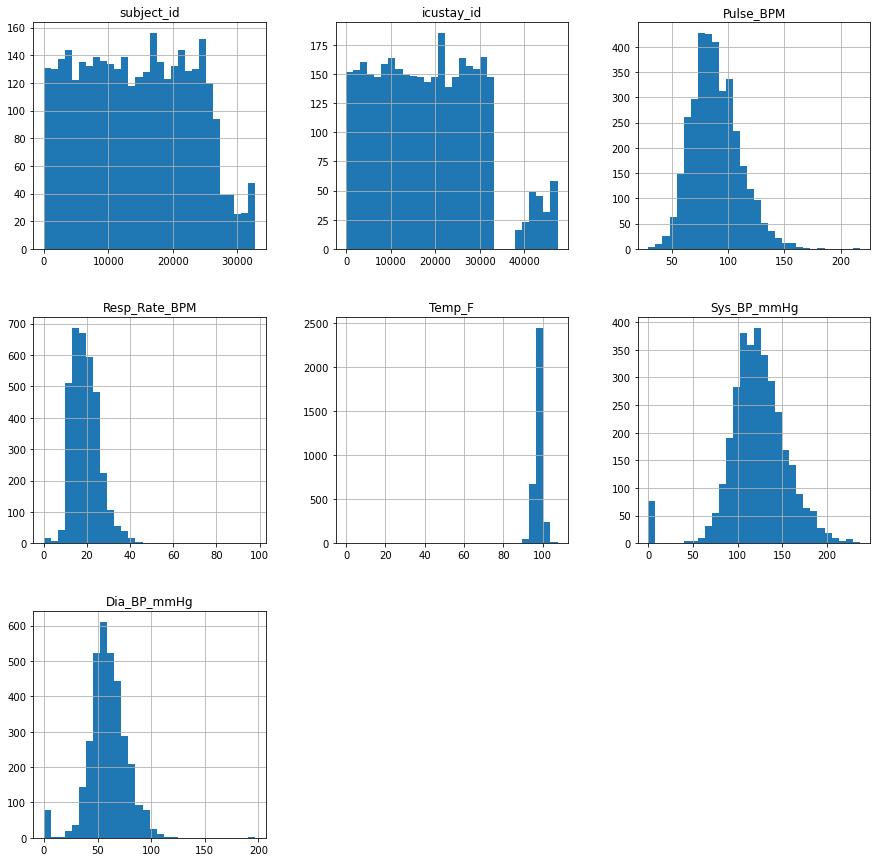

In [4]:
v4.hist(figsize= (15,15), bins =30);

Data Cleaning:

Temperature_F ; values of around 35 to be replaced by mean of the temperature, as 35 deg F is not possible, because 
below 95 deg F is hypothermia condition

Pulse (Heart) Rate ; 60 to 100 for normall a/c hopskin medical, and 60 to 80 a/c to cleaveland clinic
so we'll replace values > 170

Respiratory Rates ; 12 to 16 breaths per min a/c to hopskin for normal person, 12 to 25 a/c to cleaveland clinic
so we'll drop/replace values >50

Systolic BP; drop below 60 and above 200

Diastolic BP; drop below 30 and above 110

In [5]:
v4.isna().sum()

subject_id         0
icustay_id        17
Pulse_BPM          1
Resp_Rate_BPM      3
Temp_F            40
Sys_BP_mmHg      111
Dia_BP_mmHg      111
dtype: int64

In [6]:
# We will also be filling NA values with either mean or median

# Temperature

<AxesSubplot:>

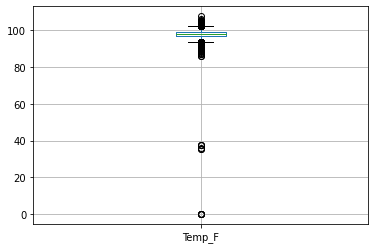

In [7]:
v4.boxplot(column = "Temp_F")

In [8]:
v4['Temp_F'].mask(v4['Temp_F'] < 90 ,v4['Temp_F'].mean() , inplace=True)

In [11]:
v4['Temp_F'].fillna(value = v4['Temp_F'].mean() , inplace = True)

<AxesSubplot:>

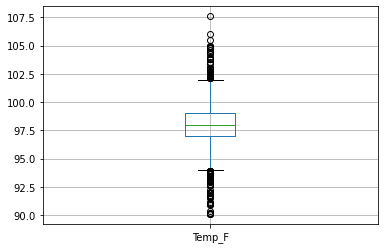

In [12]:
v4.boxplot(column = "Temp_F")

In [13]:
v4.isna().sum()

subject_id         0
icustay_id        17
Pulse_BPM          1
Resp_Rate_BPM      3
Temp_F             0
Sys_BP_mmHg      111
Dia_BP_mmHg      111
dtype: int64

# Pulse Rate

<AxesSubplot:>

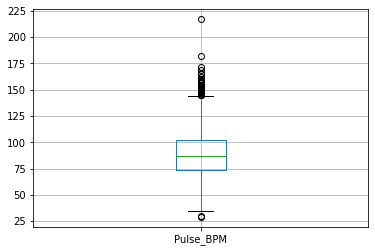

In [14]:
v4.boxplot(column = "Pulse_BPM")

In [15]:
v4['Pulse_BPM'].mask(v4['Pulse_BPM'] > 170 ,v4['Pulse_BPM'].mean() , inplace=True)

In [16]:
v4['Pulse_BPM'].fillna(value = v4['Pulse_BPM'].mean() , inplace = True)

<AxesSubplot:>

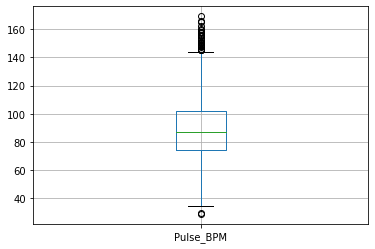

In [17]:
v4.boxplot(column = "Pulse_BPM")

# Respiratory Rate

<AxesSubplot:>

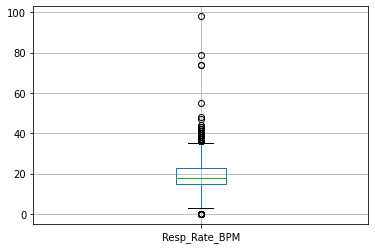

In [18]:
v4.boxplot(column = "Resp_Rate_BPM")

In [19]:
v4['Resp_Rate_BPM'].mask(v4['Resp_Rate_BPM'] > 80 ,v4['Resp_Rate_BPM'].mean() , inplace=True)

In [20]:
v4['Resp_Rate_BPM'].fillna(value = v4['Resp_Rate_BPM'].mean() , inplace = True)

<AxesSubplot:>

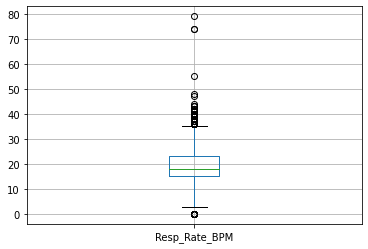

In [21]:
v4.boxplot(column = "Resp_Rate_BPM")

# BP

Sys_BP_mmHg	Dia_BP_mmHg

<AxesSubplot:>

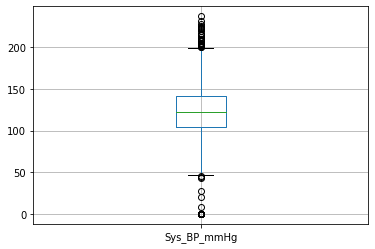

In [22]:
v4.boxplot(column = "Sys_BP_mmHg")

<AxesSubplot:>

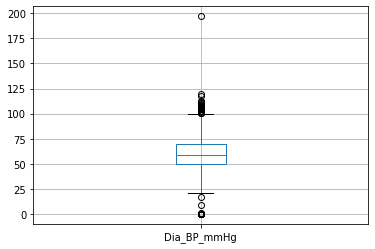

In [23]:
v4.boxplot(column = "Dia_BP_mmHg")

In [24]:
v4['Sys_BP_mmHg'].mask(v4['Sys_BP_mmHg'] > 220 ,v4['Sys_BP_mmHg'].mean() , inplace=True)

In [25]:
v4['Sys_BP_mmHg'].mask(v4['Sys_BP_mmHg'] < 50 ,v4['Sys_BP_mmHg'].mean() , inplace=True)

In [26]:
v4['Sys_BP_mmHg'].fillna(value = v4['Sys_BP_mmHg'].mean() , inplace = True)

In [28]:
v4['Dia_BP_mmHg'].mask(v4['Dia_BP_mmHg'] > 125 ,v4['Dia_BP_mmHg'].mean() , inplace=True)

In [29]:
v4['Dia_BP_mmHg'].mask(v4['Dia_BP_mmHg'] < 20 ,v4['Dia_BP_mmHg'].mean() , inplace=True)

In [27]:
v4['Dia_BP_mmHg'].fillna(value = v4['Dia_BP_mmHg'].mean() , inplace = True)

<AxesSubplot:>

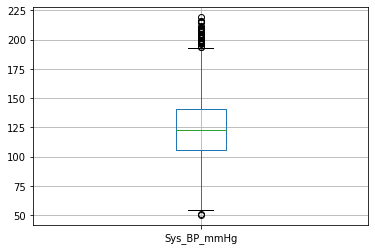

In [30]:
v4.boxplot(column = "Sys_BP_mmHg")

<AxesSubplot:>

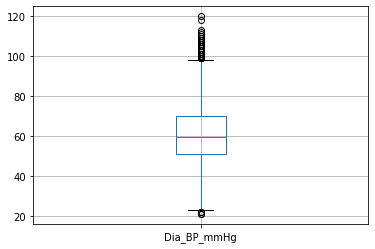

In [31]:
v4.boxplot(column = "Dia_BP_mmHg")

In [32]:
v4.describe()

,subject_id,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
count,3471.000000,3454.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000
mean,14342.510228,18401.690793,88.580982,19.309208,98.035094,125.044968,60.962658
std,8427.369037,11442.089960,20.988552,6.621651,1.780172,26.886261,14.645040
min,3.000000,4.000000,29.000000,0.000000,90.099998,50.000000,21.000000
25%,7149.500000,8957.250000,74.000000,15.000000,97.000000,106.000000,51.000000
50%,14315.000000,17961.500000,87.000000,18.000000,98.000000,123.000000,59.619643
75%,21370.500000,26736.250000,102.000000,23.000000,99.000000,141.000000,70.000000
max,32763.000000,47473.000000,169.000000,79.000000,107.599998,219.000000,120.000000


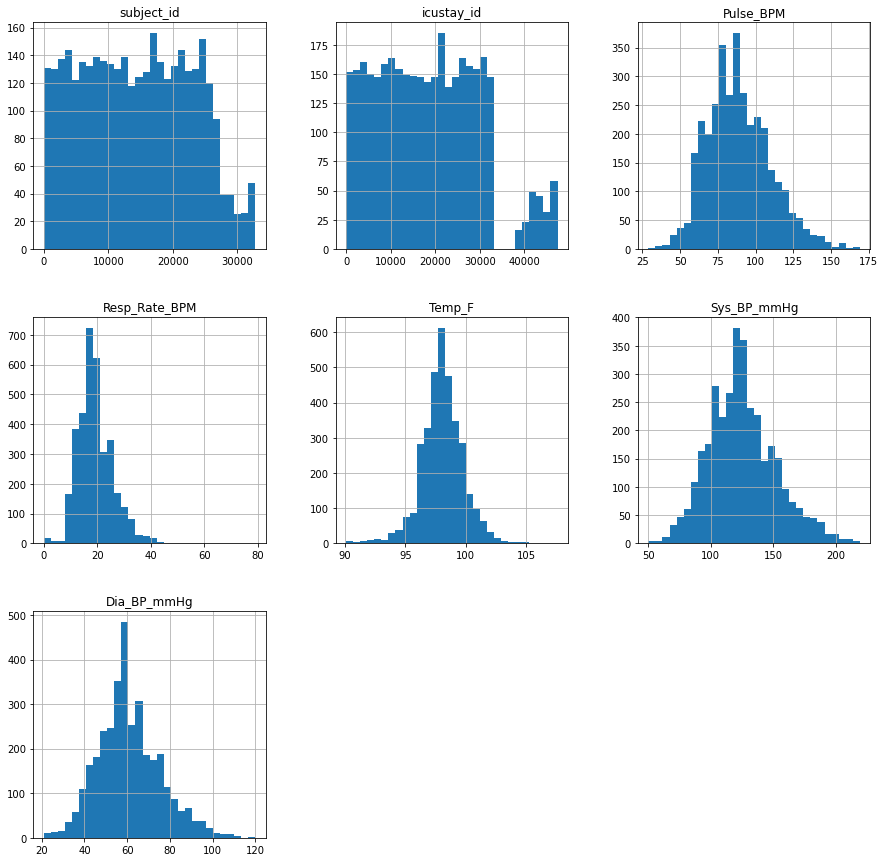

In [33]:
v4.hist(figsize= (15,15), bins =30);

In [34]:
v4.isna().sum()

subject_id        0
icustay_id       17
Pulse_BPM         0
Resp_Rate_BPM     0
Temp_F            0
Sys_BP_mmHg       0
Dia_BP_mmHg       0
dtype: int64

In [35]:
v4.to_csv("Cleaned_Vital_Signs.csv", index = False)

In [36]:
v4

,subject_id,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
0,56,62.0,74.0,24.0,95.500000,141.0,56.0
1,3,4.0,151.0,5.0,98.199997,78.0,49.0
2,21,23.0,77.0,16.0,98.199997,107.0,49.0
3,12,13.0,88.0,12.0,96.300003,123.0,68.0
4,26,29.0,60.0,18.0,99.699997,102.0,45.0
...,...,...,...,...,...,...,...
3466,32675,47381.0,109.0,21.0,97.400002,98.0,47.0
3467,32637,47337.0,49.0,12.0,95.400002,82.0,55.0
3468,32763,47473.0,93.0,24.0,99.400002,100.0,52.0
3469,32686,47394.0,70.0,25.0,96.699997,146.0,71.0


# Merging Vital Signs and Summarized ICD 9 File

In [118]:
file = pd.read_csv("summarized_icd_details_latest.csv")

In [119]:
file.columns

Index(['subject_id_x', 'hadm_id', 'admit_dt', 'sex', 'dob', 'age_at_adm',
       'subject_id_y', 'sequence', 'code', 'description', 'category',
       'subject_id', 'marital_status_itemid', 'marital_status_descr',
       'ethnicity_itemid', 'ethnicity_descr', 'overall_payor_group_itemid',
       'overall_payor_group_descr', 'religion_itemid', 'religion_descr',
       'admission_type_itemid', 'admission_type_descr',
       'admission_source_itemid', 'admission_source_descr', 'seasons'],
      dtype='object')

#### First dropping irrelavent columns

In [120]:
file.drop(['subject_id_x',
           'admit_dt',
           'dob',
           'subject_id_y',
           'sequence',
           'code',
           'description',
           'marital_status_itemid',
           'ethnicity_itemid',
           'overall_payor_group_itemid',
           'religion_itemid',
           'admission_type_itemid',
           'admission_source_itemid',
           'admission_source_descr'
        ], axis = 1, inplace = True)

In [121]:
file

,hadm_id,sex,age_at_adm,category,subject_id,marital_status_descr,ethnicity_descr,overall_payor_group_descr,religion_descr,admission_type_descr,seasons
0,2075,M,76.0,Infectious diseases,3,MARRIED,WHITE,MEDICARE,CATHOLIC,EMERGENCY,autumn
1,12532,M,72.0,Neoplasms,12,MARRIED,WHITE,MEDICARE,JEWISH,ELECTIVE,autumn
2,20666,M,87.0,Ischemic heart disease,21,MARRIED,WHITE,MEDICARE,JEWISH,EMERGENCY,autumn
3,15067,M,72.0,Other forms of heart disease,26,SINGLE,UNKNOWN/NOT SPECIFIED,MEDICARE,CATHOLIC,EMERGENCY,spring
4,15325,M,72.0,Neurologic disease,31,MARRIED,WHITE,MEDICARE,CATHOLIC,EMERGENCY,summer
...,...,...,...,...,...,...,...,...,...,...,...
3917,30102,M,68.0,Pulmonary disease,32686,MARRIED,WHITE,PRIVATE,UNOBTAINABLE,EMERGENCY,spring
3918,33462,F,80.0,Infectious diseases,32705,WIDOWED,WHITE,PRIVATE,PROTESTANT QUAKER,EMERGENCY,spring
3919,35651,M,81.0,Cerebrovascular disease,32706,WIDOWED,WHITE,MEDICARE,CATHOLIC,EMERGENCY,spring
3920,36069,F,85.0,Arteries & veins,32711,MARRIED,WHITE,MEDICARE,NOT SPECIFIED,EMERGENCY,spring


# Merging file and v4

In [122]:
file.columns

Index(['hadm_id', 'sex', 'age_at_adm', 'category', 'subject_id',
       'marital_status_descr', 'ethnicity_descr', 'overall_payor_group_descr',
       'religion_descr', 'admission_type_descr', 'seasons'],
      dtype='object')

In [123]:
v4.columns

Index(['subject_id', 'icustay_id', 'Pulse_BPM', 'Resp_Rate_BPM', 'Temp_F',
       'Sys_BP_mmHg', 'Dia_BP_mmHg'],
      dtype='object')

In [124]:
file.shape

(3922, 11)

In [125]:
v4.shape

(3471, 7)

In [126]:
file.isna().sum()

hadm_id                        0
sex                           13
age_at_adm                     0
category                       1
subject_id                     0
marital_status_descr         328
ethnicity_descr                0
overall_payor_group_descr      0
religion_descr               103
admission_type_descr           0
seasons                        0
dtype: int64

In [127]:
# file["category"].fillna(value = file["category"].mode()[0], inplace = True)

In [128]:
# file["marital_status_descr"].fillna(value = file["marital_status_descr"].mode()[0], inplace = True)

In [129]:
# file["religion_descr"].fillna(value = file["religion_descr"].mode()[0], inplace = True)

In [130]:
file.isna().sum()

hadm_id                        0
sex                           13
age_at_adm                     0
category                       1
subject_id                     0
marital_status_descr         328
ethnicity_descr                0
overall_payor_group_descr      0
religion_descr               103
admission_type_descr           0
seasons                        0
dtype: int64

In [131]:
df1 = file.merge(v4, on="subject_id", how = "right")

In [132]:
df1.isna().sum()

hadm_id                       36
sex                           43
age_at_adm                    36
category                      36
subject_id                     0
marital_status_descr         344
ethnicity_descr               36
overall_payor_group_descr     36
religion_descr               135
admission_type_descr          36
seasons                       36
icustay_id                    17
Pulse_BPM                      0
Resp_Rate_BPM                  0
Temp_F                         0
Sys_BP_mmHg                    0
Dia_BP_mmHg                    0
dtype: int64

In [133]:
df1["sex"].fillna(value = df1["sex"].mode()[0], inplace = True)

df1["age_at_adm"].fillna(value = df1["age_at_adm"].mode()[0], inplace = True)

df1["category"].fillna(value = df1["category"].mode()[0], inplace = True)

df1["marital_status_descr"].fillna(value = df1["marital_status_descr"].mode()[0], inplace = True)

df1["ethnicity_descr"].fillna(value = df1["ethnicity_descr"].mode()[0], inplace = True)

df1["overall_payor_group_descr"].fillna(value = df1["overall_payor_group_descr"].mode()[0], inplace = True)

df1["religion_descr"].fillna(value = df1["religion_descr"].mode()[0], inplace = True)

df1["admission_type_descr"].fillna(value = df1["admission_type_descr"].mode()[0], inplace = True)

df1["seasons"].fillna(value = df1["seasons"].mode()[0], inplace = True)

In [134]:
df1.isna().sum()

hadm_id                      36
sex                           0
age_at_adm                    0
category                      0
subject_id                    0
marital_status_descr          0
ethnicity_descr               0
overall_payor_group_descr     0
religion_descr                0
admission_type_descr          0
seasons                       0
icustay_id                   17
Pulse_BPM                     0
Resp_Rate_BPM                 0
Temp_F                        0
Sys_BP_mmHg                   0
Dia_BP_mmHg                   0
dtype: int64

In [135]:
df1

,hadm_id,sex,age_at_adm,category,subject_id,marital_status_descr,ethnicity_descr,overall_payor_group_descr,religion_descr,admission_type_descr,seasons,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
0,28766.0,F,90.0,Neoplasms,56,MARRIED,WHITE,MEDICARE-PRIVATE,NOT SPECIFIED,EMERGENCY,winter,62.0,74.0,24.0,95.500000,141.0,56.0
1,2075.0,M,76.0,Infectious diseases,3,MARRIED,WHITE,MEDICARE,CATHOLIC,EMERGENCY,autumn,4.0,151.0,5.0,98.199997,78.0,49.0
2,20666.0,M,87.0,Ischemic heart disease,21,MARRIED,WHITE,MEDICARE,JEWISH,EMERGENCY,autumn,23.0,77.0,16.0,98.199997,107.0,49.0
3,12532.0,M,72.0,Neoplasms,12,MARRIED,WHITE,MEDICARE,JEWISH,ELECTIVE,autumn,13.0,88.0,12.0,96.300003,123.0,68.0
4,15067.0,M,72.0,Other forms of heart disease,26,SINGLE,UNKNOWN/NOT SPECIFIED,MEDICARE,CATHOLIC,EMERGENCY,spring,29.0,60.0,18.0,99.699997,102.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,35514.0,M,57.0,Infectious diseases,32675,SEPARATED,BLACK/AFRICAN AMERICAN,MEDICAID,NOT SPECIFIED,EMERGENCY,spring,47381.0,109.0,21.0,97.400002,98.0,47.0
3467,33139.0,F,33.0,Cerebrovascular disease,32637,DIVORCED,WHITE,MEDICAID,CATHOLIC,EMERGENCY,summer,47337.0,49.0,12.0,95.400002,82.0,55.0
3468,33007.0,M,79.0,Pulmonary disease,32763,MARRIED,WHITE,MEDICARE,CATHOLIC,EMERGENCY,summer,47473.0,93.0,24.0,99.400002,100.0,52.0
3469,30102.0,M,68.0,Pulmonary disease,32686,MARRIED,WHITE,PRIVATE,UNOBTAINABLE,EMERGENCY,spring,47394.0,70.0,25.0,96.699997,146.0,71.0


In [1]:
df1.to_csv("Data_For_ML.csv", index = False)

NameError: name 'df1' is not defined